In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
from skimage import io, filters, color, exposure
import glob

In [14]:
fnames = glob.glob("./*.jpg")

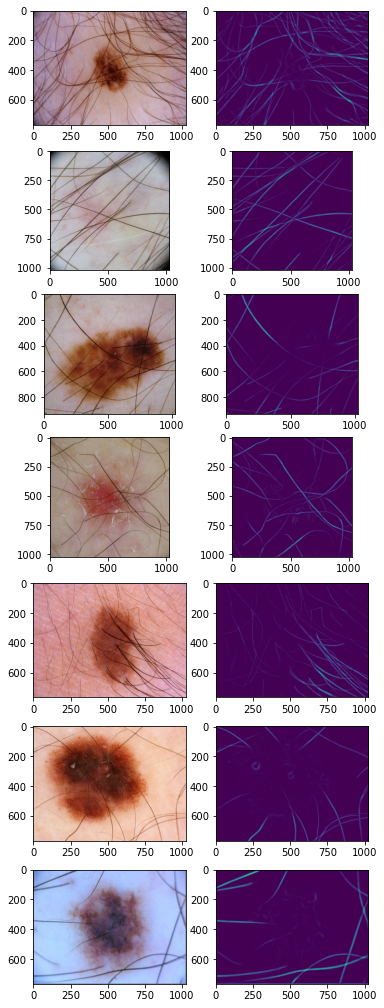

In [30]:
fig, ax = plt.subplots(len(fnames), 2, figsize=(6,18))

for i, fn in enumerate(fnames):
    img = io.imread(fn)
    img_g = color.rgb2gray(img)

    frangi = filters.frangi(img_g)
    frangi /= frangi.max()

    ax[i,0].imshow(img)
    ax[i,1].imshow(frangi)